In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
T = 100000  #Number of conformations
N = 100     #Number of monomers
b = 3       #Bond length

#Reading the generated .xyz file for corresponding parameter values
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=100_T=100000.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])

In [3]:
#Finding Rg**2  (Rg = Radius of gyration)
Rg_2 = []
for i in range(T):
    x_cm = np.mean(x[i,:])
    y_cm = np.mean(y[i,:])
    z_cm = np.mean(z[i,:])
    rg_2 = np.mean((x[i,:]-x_cm)**2 + (y[i,:]-y_cm)**2 + (z[i,:]-z_cm)**2)
    Rg_2.append(rg_2)

In [4]:
#Finding Q**2  (Q = end-to-end distance)
Q2 = []
for i in range(T):
    Q2.append((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2)

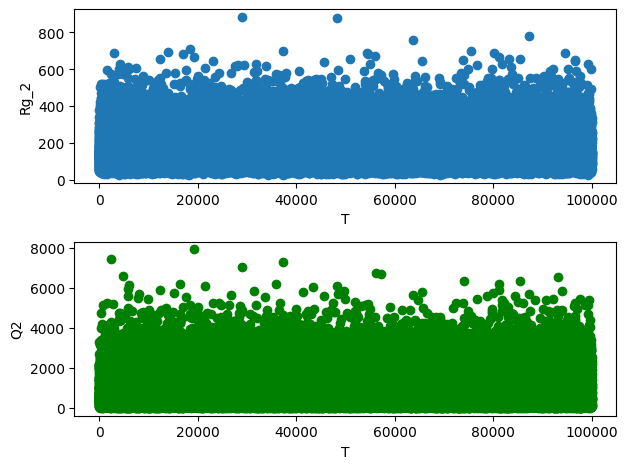

In [7]:
time = np.arange(0,T)  #Taking 1 conformation as equivalently 1 unit time

#Plot of Rg**2 as a function of number of conformations
plt.subplot(2,1,1)
plt.scatter(time,Rg_2)
plt.xlabel('T')
plt.ylabel('Rg_2')

#Plot of Q**2 as a function of number of conformations
plt.subplot(2,1,2)
plt.scatter(time,Q2,color='g')
plt.xlabel('T')
plt.ylabel('Q2')
plt.tight_layout()

In [8]:
#Theoretical value of Q**2
Q2_theory = N*b*b
Q2_est = np.mean(Q2)
print(f'Q**2 theroetical is {Q2_theory} and Q**2 experimental is {Q2_est}')

Q**2 theroetical is 900 and Q**2 experimental is 902.37962179903


In [9]:
#Finding the probability of the distribution as the function of end-to-end distance
Prob_Q = []
Q = [np.sqrt(Q2[i]) for i in range(len(Q2))]
for q in Q:
    P = 4*np.pi*q*q*(3/(2*np.pi*N*b*b))**(3/2) * np.exp((-3*q*q)/(2*N*b*b))
    Prob_Q.append(P)
Q_hist, bin_edges = np.histogram(Q,bins=50)

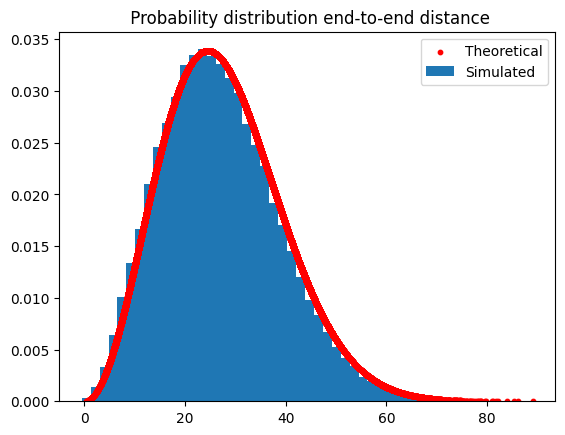

In [14]:
plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges),label='Simulated')   #Plotting the histogram of probabilities
plt.scatter(Q,Prob_Q,s=10,color='r',label='Theoretical')   #Plotting the envelope of the probability curve
plt.title('Probability distribution end-to-end distance')
plt.legend()

In [26]:
#Finding the index of the maximum value in Q
index = list(Q_hist/T/np.diff(bin_edges)).index(max(Q_hist/T/np.diff(bin_edges)))

In [30]:
Q_mp = bin_edges[:-1][index]
Q_mp_theoretical = np.sqrt(4*N*b*b/(3*np.sqrt(np.pi)))  #Theoretical value for most probable value for Q

In [29]:
print(f'Most probable value of Q calculated is {Q_mp} and theoretical value is {Q_mp_theoretical}')

Most probable value of Q calculated is 23.447946524555448 and theoretical value is 26.019752117522327
